# "Hello, World of Data!": Your ABC Blocks in Data Handling, Analysis, and Visualization  
## Section 5: Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
cities = pd.read_csv("datasets/Cities.csv")
countries = pd.read_csv("datasets/Countries.csv")

In [3]:
cities.head()

,city,country,latitude,longitude,temperature
0,Aalborg,Denmark,57.03,9.92,7.52
1,Aberdeen,United Kingdom,57.17,-2.08,8.10
2,Abisko,Sweden,63.35,18.83,0.20
3,Adana,Turkey,36.99,35.32,18.67
4,Albacete,Spain,39.00,-1.87,12.62


In [4]:
countries.head()

,country,population,EU,coastline
0,Albania,2.90,no,yes
1,Andorra,0.07,no,no
2,Austria,8.57,yes,no
3,Belarus,9.48,no,no
4,Belgium,11.37,yes,yes


### Simple and fast static visualization: pandas 
Basic plotting can be done directly within pandas.  Refer to the pandas documentation for a full description of the types of plots you can make using pandas.
https://pandas.pydata.org/pandas-docs/stable/visualization.html

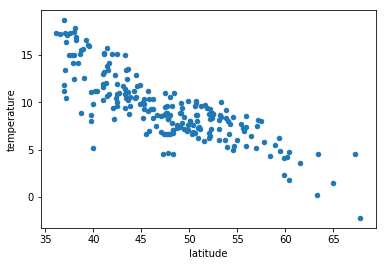

In [5]:
cities.plot.scatter(x="latitude", y="temperature")

In [6]:
ser_pie = pd.Series(list(countries.population), 
                    index=list(countries.country))
ser_pie.head()

Albania     2.90
Andorra     0.07
Austria     8.57
Belarus     9.48
Belgium    11.37
dtype: float64

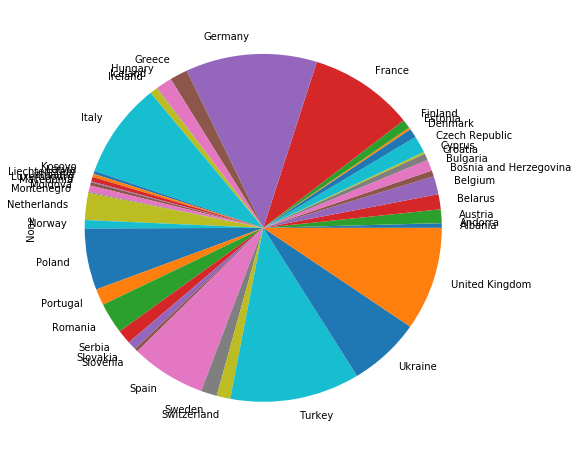

In [7]:
ser_pie.plot(kind="pie", figsize=(8,8))

### More customized static visualization: seaborn  
For a full API description, some tutorials, and a ton of inspiration, go to seaborn.pydata.org.

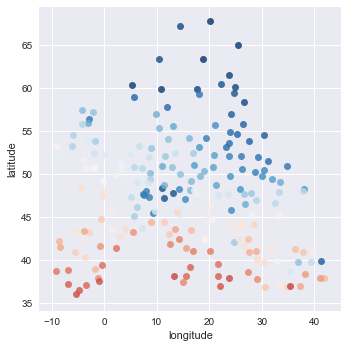

In [8]:
import seaborn as sns
sns.set_palette(sns.color_palette("RdBu_r", 213))
sns.lmplot(x="longitude", y="latitude", data=cities, 
           hue="temperature", fit_reg=False, legend=False)

The thing about this plot is that the colors are treated as categories, which shouldn't be the case.  Temperature, after all, is a continuous variables.  If you were to make `legend=True`, the legend would be a very long list of colors.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


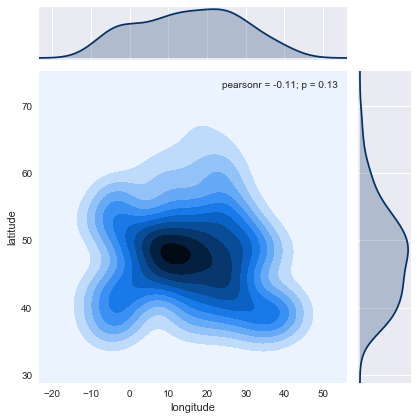

In [9]:
sns.jointplot(x="longitude", y="latitude", data=cities, kind="kde")

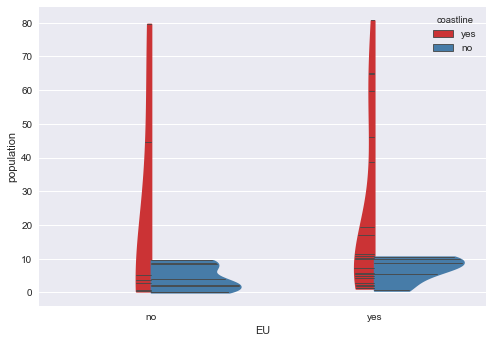

In [10]:
sns.violinplot(x="EU", y="population", hue="coastline", data=countries, 
               cut=0, split=True, palette="Set1", inner="stick")

### Interactive plots: Plotly

Plotly is a great tool for interactive visualizations. 

The first thing you need to do is import the plotly libraries. 

<b>Important!</b> In order to plot the with plotly, it is advisable to [set up an account](https://plot.ly/accounts/login/?action=login). Once you've registered, please change the username and API key to  your account's corresponding username and API key. You can get your API key here: [https://plot.ly/settings/api](https://plot.ly/settings/api).

Each account can save a limited number of charts per day. Thus, we highly recommend you set up your own account to keep the default account below (ibtingzon3) from reaching the daily limit. 

In [11]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='ibtingzon3', api_key='pgwLV329tMu2Qo385mWz') #change to your username and API key!

In [12]:
trace = go.Scatter(
    x = cities['latitude'],
    y = cities['temperature'],
    mode = 'markers',
    text=cities['city']
)

data = [trace]

layout = go.Layout(
    title = "Interactive Temperature vs Latitude Scatterplot",
    xaxis=dict(title='Latitude'),
    yaxis=dict(title="Temperature"),
    hovermode= 'closest',
    width=800,
    height=500
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='cities-scatter')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~ibtingzon3/0 or inside your plot.ly account where it is named 'cities-scatter'


In [13]:
eu_countries = countries[countries.EU == 'yes']
eu_countries_sorted = eu_countries.sort_values('population', ascending='True')

trace = go.Bar(x=eu_countries_sorted['country'],
               y=eu_countries_sorted['population']
        )
data = [trace]

layout = go.Layout(
    title = "Population of Countries in the EU",
    xaxis=dict(title='Countries'),
    yaxis=dict(title="Population (millions)"),
    width=800,
    height=500
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='eu-population')

In [19]:
codes = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
countries = countries.merge(codes, left_on='country', right_on='COUNTRY', how='outer')

data = [dict(
            type = 'choropleth',
            locations = countries['CODE'],
            z = countries['population'],
            text = countries['country'],
            autocolorscale = True,
            colorbar = dict(
                title = 'Population (millions)'),
        )]

layout = dict(
    title = 'Population of Countries in Europe',
    hovermode= 'closest',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='world-map' )